<a href="https://colab.research.google.com/github/shimazahabi/Rayan-AI-Course/blob/main/Homework_2_Shima_Zahabi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 2** || **Title**: Neural Networks and Deep Learning</em></font>


Neural Networks are one of the most widely used and capable tools used in the field of Artificial Intelegence though not the only one. In this notebook we will go through some of the important elements in these networks and build a couple of simple examples of them for diffrent tasks.

### Demo

Here is an interactive example of Neural Networks along with some of their applications. A few things you can try with it:


1. Try all three types of applications.
1. Use high and low values of learning rate.
1. Change the network width or depth to see which is more effective
1. Change the number of samples in regression to see the effect.
1. Find setting from above that will result in an overfit.







Open the notebook in Google Colab for better experience.

In [ ]:
#@title Neural Networks Demo
!git clone https://github.com/teimuri/Deep_learning_tutorials.git
# Read the content of the HTML file
with open('/content/Deep_learning_tutorials/Javas/JavaScript Neural Network Demos_finals.html', 'r') as file:
    html_content = file.read()

# Display the HTML content
from IPython.core.display import display, HTML
display(HTML(html_content))


Cloning into 'Deep_learning_tutorials'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 120.74 KiB | 1.01 MiB/s, done.
Resolving deltas: 100% (4/4), done.


<small>
The demo above is an altered version of <a href='https://45deg.github.io/neural-network/index.html'> this demo</a>, It is advised to try it to get an intution of how Neural Networks work. You can also find more examples on <a href='https://playground.tensorflow.org/'> Tensorflow playground</a> or convnetjs <a href='https://cs.stanford.edu/people/karpathy/convnetjs/'> demonstration page</a>.

## Binary Classification



### Import libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.style as mplstyle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression, make_s_curve, make_blobs
from sklearn.model_selection import train_test_split

### Dataset

Soooo...\
Now we need a dataset to classify. For this example we will use some synthetic datasets provided by sklearn. This will allow us to easily change the dataset to study different situtations.

First type of dataset we try is make_blobs. To use we'll write:


```
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=0.5, center_box=(-10.0, 10.0), n_features=2,random_state=40)
```
In this commad `centers` define the number of classes, `cluster_std` is the std of distribution for each class and `center_box` defines the center point of each distribution. Also `X` is the feuture matrix which contains a vector of features for each point and `y` is the set of labels for all of the points.

In this command and all the commands in python `random_state` refers to the seed used by the random function.
The rest of the code in the cell is to visualize the dataset.


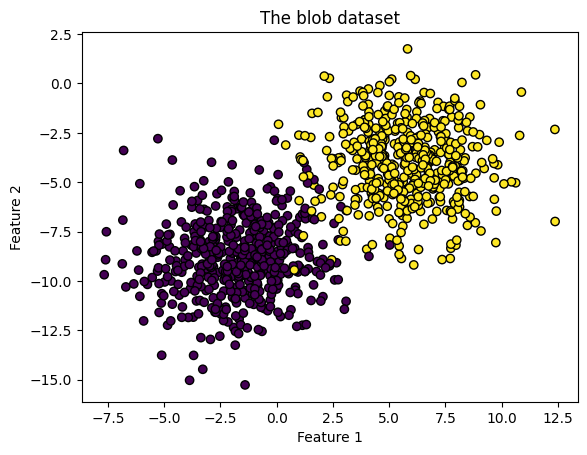

In [ ]:
#Create the dataset
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=2, center_box=(-10.0, 10.0), n_features=2,random_state=40)

#Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title('The blob dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Of course we also have to split the dataset into train and test parts.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Since we are going to use backpropagation a lot, we need to utilize a library that provides us with easy access to gradient values and preferably provides us with more tools to develop a neural network.

The two most libraries are **Pytorch** and **Tensorflow**. In this notebook we will use Pytorch since it has a more intutive user inteface but Tensorflow is just as capable.\
Now to use our data within the environment of Pytorch we should conver all of our tensors and matrix to the type provided by Pytorch. It is performed like this:
```
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
```
Where `X_train` is a tensor/matrix/list and should be converted to a torch tensor. We repeat the same proccess for all other parts of the data.

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

### Defining the Model

In this section, we'll define a simple neural network model using PyTorch.

<h3>Step-by-Step Explanation</h3>
<h4>Import Necessary Modules</h4>

First, ensure you have imported the necessary modules from PyTorch:
```
import torch
import torch.nn as nn
```
We have done this part before.
<h4>Define the Model</h4>

We'll define a simple classifier model by creating a subclass of `nn.Module`. This is done by the first line, `class SimpleClassifier(nn.Module)`. Subclass is like a copy of the class that is pasted into our new defined class. This is useful as it lets us have a class with advnace features while being enable to alter it.\
This model will have two fully connected (linear) layers with ReLU and Sigmoid activations. Here's the code:

```
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 10)   # First fully connected layer (input size: 2, output size: 10)
        self.relu = nn.ReLU()         # ReLU activation function
        self.fc2 = nn.Linear(10, 1)   # Second fully connected layer (input size: 10, output size: 1)
        self.sigmoid = nn.Sigmoid()   # Sigmoid activation function

    def forward(self, x):
        out = self.fc1(x)             # Apply first fully connected layer
        out = self.relu(out)          # Apply ReLU activation
        out = self.fc2(out)           # Apply second fully connected layer
        out = self.sigmoid(out)       # Apply Sigmoid activation
        return out
```

<h3>Explanation of the Model Components</h3>

`__init__` Method: This is the constructor method where we define the layers of our model. We call the constructor of the parent class (nn.Module) using super(). It is ok if you couldn't follow. But it is important to know that ` def __init__(self)` is run when the class is instantiated to define anything necessary about that instance of the class. We will also talk about class instantiation later.

`super(SimpleClassifier, self).__init__()` is also important but ok if you don't know it. Just use it whenever writing a torch model.
Then, we define the neural ne:

- `self.fc1`: A fully connected layer that takes an input of size 2 and outputs with a of size 10.
- `self.relu`: A ReLU activation function.
- `self.fc2`: Another fully connected layer that takes an input of size 10 and outputs with a size of 1.
- `self.sigmoid`: A Sigmoid activation function.
forward Method: This method defines the forward pass of the network, which is the process of passing input data through the network layers to get an output.

<h3>Forward pass</h3>

Whenever the model is called it will run the `forward` function. The input of the call is also passed to it. This is basically how we use our model. Here is what happens inside the forward pass.

- Passing the input `x` through the first fully connected layer (`self.fc1`).
- Applying the ReLU activation function (`self.relu`).
- Passing the result through the second fully connected layer (`self.fc2`).
- Applying the Sigmoid activation function (`self.sigmoid`).
- Returning the final output.

This simple classifier model takes a 2-dimensional input, processes it through hidden layers with activation functions, and outputs a single value between 0 and 1, which can be interpreted as a probability.

<h3>Creating an Instance of the Model</h3>

Though it is possible here to use the class as it is, It is good practice and most of the times neccessary to instatiate the class. This will make a copy of the class and allow us to use different instances of the class. To create an instance of the SimpleClassifier model, you can do:
```
model = SimpleClassifier()
```
Now, you have a simple neural network model defined and ready to be trained on your data.

In [ ]:
# 2. Define the Model
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

model = SimpleClassifier()

### Optimization

Now we need to functions. One for the loss function and one for the optimization method e.g. Gradient Descent.

There are many loss functions and optimizers available but since it's out of topic for this note book we would only use the most simple ones.

- `criterion`/loss: This is the loss function that we are going to minimize. For classification Binary Cross Entorpy (BCE) is considered appropriate.
- `optimizer`: As said before we'll use Gradient Descent. We will provide the learning rate as `lr`.

It is important that `nn` and `optim` are both modules provided by pytorch which we imported before.

In [ ]:
# 3. Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Train Loop

Now we need to define loop that will iterate over the data multiple times and train the model.

Each time that the model is trained on all of training data is called an epoch. So for example 10 epoch is equivalent to training over the data for 10 times.

Now we will got through all the code in the next cell:
<h3>Define the Loop</h3>

```
num_epochs = 5000
for epoch in range(num_epochs):
```

To loop over the data we use a for loop and `num_epochs` is the number of time the loop is done.

- `model.train()`: This will tell the model that training has begun. This is useful when some layers behave differently in training versus testing. Though this is not the case for our model.

<h3>Find the Loss</h3>

```
outputs = model(X_train_tensor)
loss = criterion(outputs, y_train_tensor)
```
- `outputs`: Is the result of feeding the features in train data to the model. It contains a vector of length equal to number of classes (Binary Classification is an exception) for each data point.
- `loss`: `criterion` is the Binary Cross Entropy loss we defined earlier. Using it we can calculate the loss value. Please note that `y_train_tensor` is the torch tensor of the train labels and have to be provided to the loss function. This way the function can assess the discrepancy between the predicted values (`outputs`) and the actual labels (`y_train_tensor`).



<h3> Backpropagation</h3>

Believe it or not Pytorch will keep a record of all mathmatical operations performed from each weight in the model to the loss. Doing so will allow it to perform backpropagation to every weights in the model.
To use this capability of the model there a few steps that should be taken.

```
optimizer.zero_grad()
loss.backward()
optimizer.step()
```
- `optimizer.zero_grad()`: Since Pytorch will store a value for the gradient of each of the weights, we have to make sure there isn't any pre-stored gradient value for any of the weights (For example from the previouse epoch). Using this command will set all of their values to zero.
- `loss.backward()`: Backpropagation is performed and the resulting gradients are <b>added</b> to the <b>previously stored</b> values. This is the the reason we zeroed them in the previous command (To prevent accumulation of the gradients).

At last we need to check the loss status every now and then. Mainly to check if it is decreasing properly. The last two lines will just do that:

```
if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
```



In [ ]:
#@title Training Loop
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/5000], Loss: 0.7865
Epoch [20/5000], Loss: 0.3970
Epoch [30/5000], Loss: 0.2782
Epoch [40/5000], Loss: 0.2184
Epoch [50/5000], Loss: 0.1818
Epoch [60/5000], Loss: 0.1573
Epoch [70/5000], Loss: 0.1397
Epoch [80/5000], Loss: 0.1266
Epoch [90/5000], Loss: 0.1164
Epoch [100/5000], Loss: 0.1084
Epoch [110/5000], Loss: 0.1019
Epoch [120/5000], Loss: 0.0965
Epoch [130/5000], Loss: 0.0920
Epoch [140/5000], Loss: 0.0881
Epoch [150/5000], Loss: 0.0848
Epoch [160/5000], Loss: 0.0820
Epoch [170/5000], Loss: 0.0795
Epoch [180/5000], Loss: 0.0773
Epoch [190/5000], Loss: 0.0753
Epoch [200/5000], Loss: 0.0735
Epoch [210/5000], Loss: 0.0720
Epoch [220/5000], Loss: 0.0706
Epoch [230/5000], Loss: 0.0693
Epoch [240/5000], Loss: 0.0681
Epoch [250/5000], Loss: 0.0670
Epoch [260/5000], Loss: 0.0660
Epoch [270/5000], Loss: 0.0651
Epoch [280/5000], Loss: 0.0643
Epoch [290/5000], Loss: 0.0635
Epoch [300/5000], Loss: 0.0628
Epoch [310/5000], Loss: 0.0622
Epoch [320/5000], Loss: 0.0616
Epoch [330/5000],

### Evaluation

Now we need to evaluate the results. First, similar to training the model we should know that the evaluation phase has started. This is done by `model.eval()`.

Next before starting the evaluation we should let pytorch know that no gradients are needed in this phase. Doing so will reduce the required memory as backpropagation requires many extra values to be stored. This is exceptionally important in the case of large models, since backpropagation can increase the required memory by many folds.



Accuracy: 0.9767


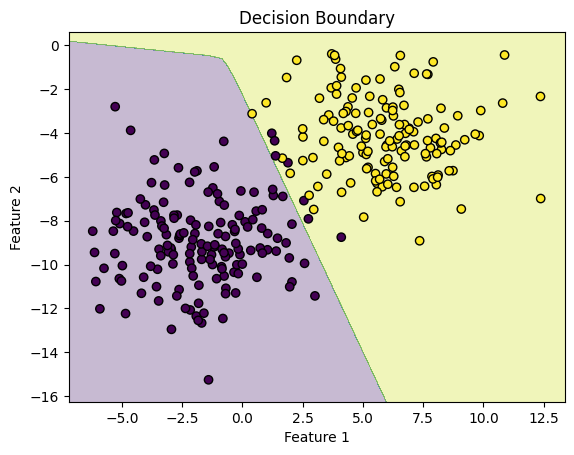

In [ ]:
#@title Evaluate the Model
model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    y_pred = (y_pred_probs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor.numpy(), y_pred.numpy())
    print(f'Accuracy: {accuracy:.4f}')

# 6. Plot the Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = (Z > 0.5).float()
    Z = Z.reshape(xx.shape).numpy()

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, model)

# Regression

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.style as mplstyle

## Dataset

Here we go again. We need a dataset to perform regression analysis. For this example, we will use some synthetic datasets provided by sklearn. This will allow us to easily change the dataset to study different situations.

For regression, we'll use the make_regression function. To use it, we'll write:


```
X, y = make_regression(<fill hear>)
```
In this command you have to define a few inputs. Define them as follows:

- `n_samples=100`: Defines the number of samples in the dataset.
- `n_features=1`: Specifies the number of features (independent variables).
- `noise=10`: Specifies the standard deviation of the Gaussian noise applied to the output, making the dataset more realistic.
- `random_state=42`: Ensures reproducibility by setting the seed for the random number generator.

X is the feature matrix which contains a vector of features for each point, and y is the target variable we aim to predict.

The rest of the code in the cell is to visualize the dataset. We use matplotlib to create a scatter plot of the generated data points. This helps in understanding the distribution and spread of the data. The plot shows the relationship between the feature and the target variable, which is the basis of regression analysis.


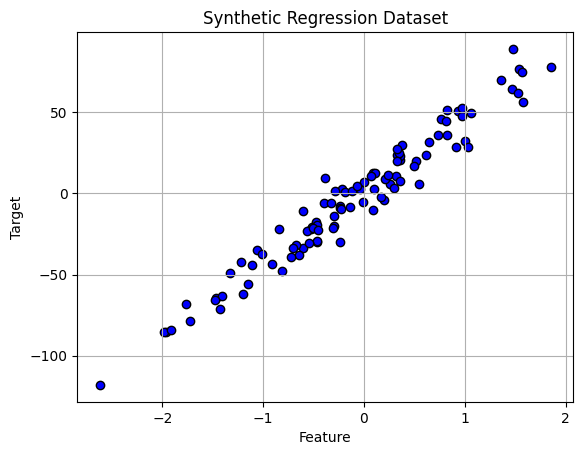

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression,make_s_curve

# Generate a synthetic regression dataset
X, y =  make_regression(n_samples=100,n_features=1,noise=10,random_state=42)
x_train = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)
# Plot the dataset
plt.scatter(X, y, color='blue', marker='o', edgecolor='black')
plt.title('Synthetic Regression Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True)
plt.show()

## Model Architecture



The model architecture is defined as follows:

1. **Input Layer:**  
   Shape: `1 x 512`
   
2. **Hidden Layer 1:**  
   Shape: `512 x 512`
   
3. **Hidden Layer 2:**  
   Shape: `512 x 512`
   
4. **Output Layer:**  
   Shape: `512 x 1`

Try making this model with only these blocks:
`nn.Linear(input_dim, output_dim)`, `nn.BatchNorm1d(input_dim)`, `nn.ReLU()`.

You should be familiar with these elements by now. Try using them in `nn.sequential` to construct the model.

If you are not familiar, `nn.Sequential` is used so that we don't need to define each layer with a new variable. This allows us to stack layers in a sequential manner, making the code more concise and readable.

In [ ]:
device = 'cpu'

In [ ]:
# 2. Define the Model
class SimpleRegressor(nn.Module):
    def __init__(self):
        super(SimpleRegressor, self).__init__()

        self.model_queue = nn.Sequential(
              nn.Linear(1, 512),
              nn.BatchNorm1d(512),
              nn.ReLU(),

              nn.Linear(512, 512),
              nn.BatchNorm1d(512),
              nn.ReLU(),

              nn.Linear(512, 1),
            )

    def forward(self, x):
        out = self.model_queue(x)
        return out
#Now instance the class and import it to gpu
model = SimpleRegressor()

### Training

We will make a training loop. First we need an optimizer and a criterion.

Pay attention that the criterion used in the classification part may not be appropriate.

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Now we will define a training loop.

In [ ]:
x_train.shape

torch.Size([100, 1])

In [ ]:
# 4. Training Loop
num_epochs = 6000
all_predictions = []

#Transfer you dataset to gpu
#Transfer x_train
#Transfer y_train
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_train.to(device)
y_train.to(device)

for epoch in range(num_epochs):

    outputs = model(x_train)

    #Find the loss
    #zero out gradients
    #perform backpropagation
    #update weights
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        model.eval()
        with torch.no_grad():
            predicted = model(x_train).cpu().detach().numpy()
        all_predictions.append(predicted)
        model.train()

Epoch [10/6000], Loss: 358.5536
Epoch [20/6000], Loss: 133.4456
Epoch [30/6000], Loss: 89.7256
Epoch [40/6000], Loss: 89.2979
Epoch [50/6000], Loss: 78.1809
Epoch [60/6000], Loss: 78.8336
Epoch [70/6000], Loss: 77.5942
Epoch [80/6000], Loss: 77.1507
Epoch [90/6000], Loss: 77.0693
Epoch [100/6000], Loss: 76.9231
Epoch [110/6000], Loss: 76.8230
Epoch [120/6000], Loss: 76.7489
Epoch [130/6000], Loss: 76.6809
Epoch [140/6000], Loss: 76.6178
Epoch [150/6000], Loss: 76.5576
Epoch [160/6000], Loss: 76.5005
Epoch [170/6000], Loss: 76.4451
Epoch [180/6000], Loss: 76.3880
Epoch [190/6000], Loss: 76.3284
Epoch [200/6000], Loss: 76.2661
Epoch [210/6000], Loss: 76.2037
Epoch [220/6000], Loss: 76.1394
Epoch [230/6000], Loss: 76.0723
Epoch [240/6000], Loss: 76.0033
Epoch [250/6000], Loss: 75.9334
Epoch [260/6000], Loss: 75.8639
Epoch [270/6000], Loss: 75.7932
Epoch [280/6000], Loss: 75.7222
Epoch [290/6000], Loss: 75.6500
Epoch [300/6000], Loss: 75.5723
Epoch [310/6000], Loss: 75.4972
Epoch [320/6000

### Demonstrate


Let's see how it turned out

In [ ]:
# 5. Interactive Slider Plot
def plot_predictions(epoch):
    clear_output(wait=True)
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    plt.scatter(X, y, label='Original data')
    plt.scatter(X, all_predictions[epoch // 100], label=f'Fitted line at epoch {epoch}')
    plt.xlim(left=X.min(), right=X.max())  # Set the minimum and maximum x values
    plt.ylim(bottom=y.min()-0.5, top=y.max()+0.5)
    # plt.legend()
    plt.show()

epoch_slider = widgets.IntSlider(value=num_epochs-1, min=0, max=num_epochs-1, step=10, description='Epoch:')
widgets.interact(plot_predictions, epoch=epoch_slider)

interactive(children=(IntSlider(value=5999, description='Epoch:', max=5999, step=10), Output()), _dom_classes=…

<function __main__.plot_predictions(epoch)>

## More Complex Dataset

The previous data was a straight line, which was too easy to predict. Let's try a more complex dataset.

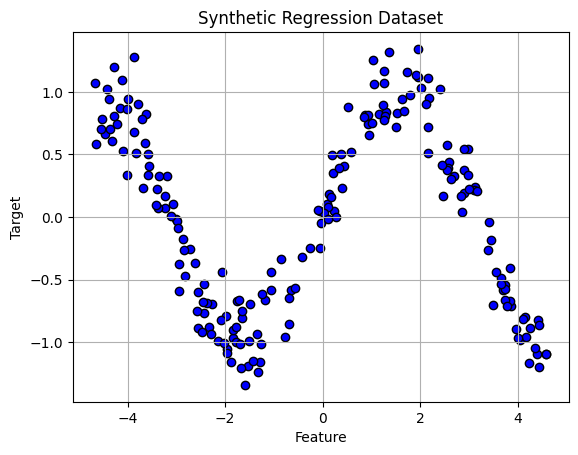

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression,make_s_curve

# Generate a synthetic regression dataset
y, X = make_s_curve(n_samples=200, noise=0.2, random_state=42)
y = y[:, 0].reshape(-1, 1)
x_train = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)
# Plot the dataset
plt.scatter(x_train, y_train, color='blue', marker='o', edgecolor='black')
plt.title('Synthetic Regression Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True)
plt.show()

## Train

You are on your own for this part, try training a Regression model on the new dataset.  

In [ ]:
# TODO: Train a model
num_epochs = 6000
all_predictions = []

#Transfer you dataset to gpu
#Transfer x_train
#Transfer y_train
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_train.to(device)
y_train.to(device)

for epoch in range(num_epochs):

    outputs = model(x_train)

    #Find the loss
    #zero out gradients
    #perform backpropagation
    #update weights
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        model.eval()
        with torch.no_grad():
            predicted = model(x_train).cpu().detach().numpy()
        all_predictions.append(predicted)
        model.train()

Epoch [10/6000], Loss: 444.6075
Epoch [20/6000], Loss: 75.6440
Epoch [30/6000], Loss: 20.0199
Epoch [40/6000], Loss: 4.3846
Epoch [50/6000], Loss: 3.7740
Epoch [60/6000], Loss: 1.1406
Epoch [70/6000], Loss: 0.4305
Epoch [80/6000], Loss: 0.3826
Epoch [90/6000], Loss: 0.2526
Epoch [100/6000], Loss: 0.1972
Epoch [110/6000], Loss: 0.1719
Epoch [120/6000], Loss: 0.1560
Epoch [130/6000], Loss: 0.1440
Epoch [140/6000], Loss: 0.1352
Epoch [150/6000], Loss: 0.1281
Epoch [160/6000], Loss: 0.1221
Epoch [170/6000], Loss: 0.1173
Epoch [180/6000], Loss: 0.1131
Epoch [190/6000], Loss: 0.1090
Epoch [200/6000], Loss: 0.1053
Epoch [210/6000], Loss: 0.1019
Epoch [220/6000], Loss: 0.0989
Epoch [230/6000], Loss: 0.0961
Epoch [240/6000], Loss: 0.0935
Epoch [250/6000], Loss: 0.0912
Epoch [260/6000], Loss: 0.0890
Epoch [270/6000], Loss: 0.0869
Epoch [280/6000], Loss: 0.0850
Epoch [290/6000], Loss: 0.0833
Epoch [300/6000], Loss: 0.0816
Epoch [310/6000], Loss: 0.0800
Epoch [320/6000], Loss: 0.0786
Epoch [330/60

In [ ]:
# 5. Interactive Slider Plot
def plot_predictions(epoch):
    clear_output(wait=True)
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    plt.scatter(X, y, label='Original data')
    plt.scatter(X, all_predictions[epoch // 100], label=f'Fitted line at epoch {epoch}')
    plt.xlim(left=X.min(), right=X.max())  # Set the minimum and maximum x values
    plt.ylim(bottom=y.min()-0.5, top=y.max()+0.5)
    # plt.legend()
    plt.show()

epoch_slider = widgets.IntSlider(value=num_epochs-1, min=0, max=num_epochs-1, step=10, description='Epoch:')
widgets.interact(plot_predictions, epoch=epoch_slider)

interactive(children=(IntSlider(value=5999, description='Epoch:', max=5999, step=10), Output()), _dom_classes=…

<function __main__.plot_predictions(epoch)>

The result seems a bit over fitted to the noise. Think about ways to reduce this overfitting.

You can try changing the epoch slider to see when results started to overfit.

#### More data

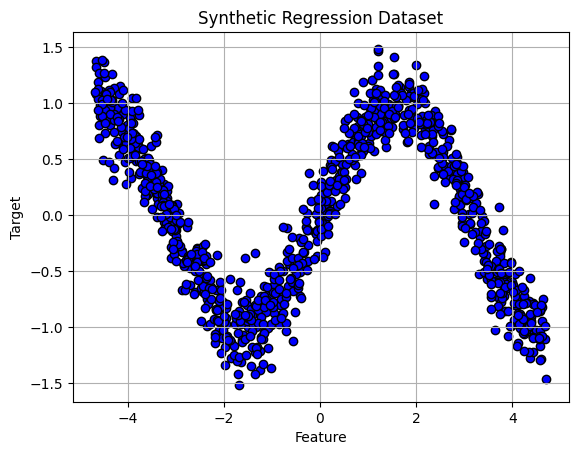

In [ ]:
y, X = make_s_curve(n_samples=1000, noise=0.2, random_state=42)
y = y[:, 0].reshape(-1, 1)
x_train = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)
# Plot the dataset
plt.scatter(x_train, y_train, color='blue', marker='o', edgecolor='black')
plt.title('Synthetic Regression Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True)
plt.show()

#### Enhance the model

In [ ]:
# Change the Model
class ComplexRegressor(nn.Module):
    def __init__(self):
        super(ComplexRegressor, self).__init__()

        self.model_queue = nn.Sequential(
              nn.Linear(1, 256),
              nn.BatchNorm1d(256),
              nn.ReLU(),
              nn.Dropout(0.2),

              nn.Linear(256, 256),
              nn.BatchNorm1d(256),
              nn.ReLU(),
              nn.Dropout(0.2),

              nn.Linear(256, 1),
            )

    def forward(self, x):
        out = self.model_queue(x)
        return out
#Now instance the class and import it to gpu
model = ComplexRegressor()

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

#### Train

In [ ]:
num_epochs = 6000
all_predictions = []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
x_train.to(device)
y_train.to(device)

for epoch in range(num_epochs):

    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        model.eval()
        with torch.no_grad():
            predicted = model(x_train).cpu().detach().numpy()
        all_predictions.append(predicted)
        model.train()

Epoch [10/6000], Loss: 0.1640
Epoch [20/6000], Loss: 0.1105
Epoch [30/6000], Loss: 0.0922
Epoch [40/6000], Loss: 0.0884
Epoch [50/6000], Loss: 0.0790
Epoch [60/6000], Loss: 0.0727
Epoch [70/6000], Loss: 0.0638
Epoch [80/6000], Loss: 0.0702
Epoch [90/6000], Loss: 0.0650
Epoch [100/6000], Loss: 0.0602
Epoch [110/6000], Loss: 0.0584
Epoch [120/6000], Loss: 0.0610
Epoch [130/6000], Loss: 0.0559
Epoch [140/6000], Loss: 0.0607
Epoch [150/6000], Loss: 0.0579
Epoch [160/6000], Loss: 0.0591
Epoch [170/6000], Loss: 0.0590
Epoch [180/6000], Loss: 0.0546
Epoch [190/6000], Loss: 0.0566
Epoch [200/6000], Loss: 0.0555
Epoch [210/6000], Loss: 0.0575
Epoch [220/6000], Loss: 0.0580
Epoch [230/6000], Loss: 0.0588
Epoch [240/6000], Loss: 0.0578
Epoch [250/6000], Loss: 0.0522
Epoch [260/6000], Loss: 0.0554
Epoch [270/6000], Loss: 0.0521
Epoch [280/6000], Loss: 0.0530
Epoch [290/6000], Loss: 0.0555
Epoch [300/6000], Loss: 0.0515
Epoch [310/6000], Loss: 0.0502
Epoch [320/6000], Loss: 0.0542
Epoch [330/6000],

In [ ]:
# Interactive Slider Plot
def plot_predictions(epoch):
    clear_output(wait=True)
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    plt.scatter(X, y, label='Original data')
    plt.scatter(X, all_predictions[epoch // 100], label=f'Fitted line at epoch {epoch}')
    plt.xlim(left=X.min(), right=X.max())  # Set the minimum and maximum x values
    plt.ylim(bottom=y.min()-0.5, top=y.max()+0.5)
    # plt.legend()
    plt.show()

epoch_slider = widgets.IntSlider(value=num_epochs-1, min=0, max=num_epochs-1, step=10, description='Epoch:')
widgets.interact(plot_predictions, epoch=epoch_slider)

interactive(children=(IntSlider(value=5999, description='Epoch:', max=5999, step=10), Output()), _dom_classes=…

<function __main__.plot_predictions(epoch)>

# Image Classification

## Loading Real Image Data
Now Let's learn the real deal, and work from a varied collection of .jpg files.

For this section we'll be working with a version of the Cats vs. Dogs dataset inspired by a classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.<br>
A quick note - do <strong>not</strong> download the dataset from Kaggle! Ours is a cleaned version of the data without any 0by0 files, etc.<br>The images are similar to ones available from the <a href='http://www.image-net.org/'>ImageNet</a> database.

We have organized the files into train and test folders, and further divided the images into CAT and DOG subfolders. In this way the file path contains the label.

### Image files directory tree
<pre>.
└── Data
    └── CATS_DOGS
        ├── test
        │   ├── CAT
        │   │   ├── 9374.jpg
        │   │   ├── 9375.jpg
        │   │   └── ... (3,126 files)
        │   └── DOG
        │       ├── 9374.jpg
        │       ├── 9375.jpg
        │       └── ... (3,125 files)       
        │           
        └── train
            ├── CAT
            │   ├── 0.jpg
            │   ├── 1.jpg
            │   └── ... (9,371 files)
            └── DOG
                ├── 0.jpg
                ├── 1.jpg
                └── ... (9,372 files)</pre>

### Perform standard imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Examine the data
We'll us Python's built-in <a href='https://docs.python.org/3/library/os.html'>os module</a> to walk the directories collecting file names. We'll then use <a href='https://python-pillow.org/'>Pillow</a>, an extension to the Python Imaging Library (PIL), to open image files and extract image sizes. A pandas DataFrame will provide summary statistics on our data like max/min width & height from which we can choose our model parameters.

In [ ]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown 1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ

Downloading...
From (original): https://drive.google.com/uc?id=1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ
From (redirected): https://drive.google.com/uc?id=1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ&confirm=t&uuid=db6ecc28-8925-4647-a492-728a1a7ba160
To: /content/CATS_DOGS.zip
100% 812M/812M [00:10<00:00, 79.1MB/s]


In [ ]:
!unzip -q CATS_DOGS.zip

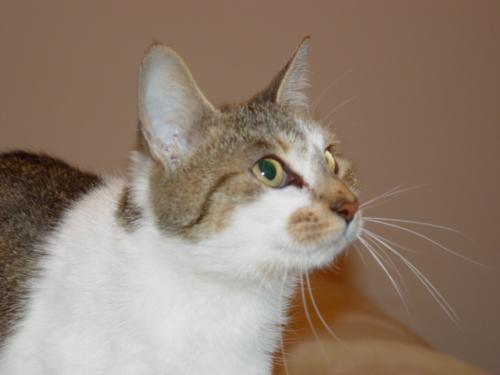

In [ ]:
# TEST YOUR VERSION OF PILLOW
# Run this cell. If you see a picture of a cat you're all set!
with Image.open('CATS_DOGS/test/CAT/10104.jpg') as im:
    display(im)

### Create a list of image filenames

In [ ]:
path = 'CATS_DOGS'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

print('Images: ',len(img_names))

Images:  24994


### Create a DataFrame of image sizes (width x height)
It's worth noting that <tt>Image.open()</tt> doesn't read the entire image into memory, so it's a reasonable way to get image sizes.<br>
Still, this can take awhile.

### Image Preprocessing
Any network we define requires consistent input data. That is, the incoming image files need to have the same number of channels (3 for red/green/blue), the same depth per channel (0-255), and the same height and width. This last requirement can be tricky. How do we transform an 800x450 pixel image into one that is 224x224?
* <a href='https://en.wikipedia.org/wiki/Aspect_ratio_(image)'><strong>aspect ratio</strong></a>: the ratio of width to height (16:9, 1:1, etc.) An 800x450 pixel image has an aspect ration of 16:9. We can change the aspect ratio of an image by cropping it, by stretching/squeezing it, or by some combination of the two. In both cases we lose some information contained in the original. Let's say we crop 175 pixels from the left and right sides of our 800x450 image, resulting in one that's 450x450.
* <strong>scale</strong>: Once we've attained the proper aspect ratio we may need to scale an image up or down to fit our input parameters. There are several libraries we can use to scale a 450x450 image down to 224x224 with minimal loss.
* <a href=''><strong>normalization</strong></a>: when images are converted to tensors, the [0,255] rgb channels are loaded into range [0,1]. We can then normalize them using the generally accepted values of mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]. For the curious, these values were obtained by the PyTorch team using a random 10,000 sample of <a href='http://www.image-net.org/'>ImageNet</a> images. There's a good discussion of this <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>here</a>, and the original source code can be found <a href='https://github.com/soumith/imagenet-multiGPU.torch/blob/master/donkey.lua#L154'>here</a>.

### Transformations
Before defining our Convolutional Network, let's look at a sample image and perform various transformations on it to see their effect.

(500, 387)


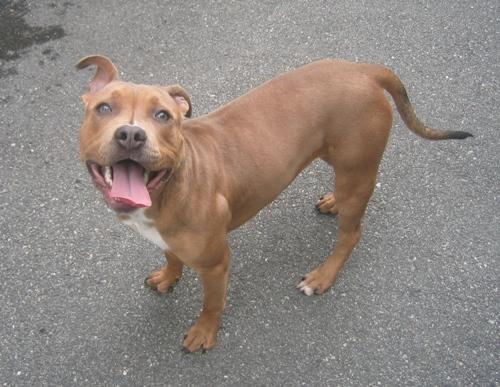

In [ ]:
dog = Image.open('CATS_DOGS/train/DOG/14.jpg')
print(dog.size)
display(dog)

This is how jupyter displays the original .jpg image. Note that size is given as (width, height).<br>
Let's look at a single pixel:

In [ ]:
r, g, b = dog.getpixel((0, 0))
print(r,g,b)

90 95 98


The pixel at position [0,0] (upper left) of the source image has an rgb value of (90,95,98). This corresponds to <font style="background-color:rgb(90,95,98)">this color </font><br>
Great! Now let's look at some specific transformations.
### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor'><tt>transforms.ToTensor()</tt></a>
Converts a PIL Image or numpy.ndarray (HxWxC) in the range [0, 255] to a <tt>torch.FloatTensor</tt> of shape (CxHxW) in the range [0.0, 1.0]

torch.Size([3, 387, 500])


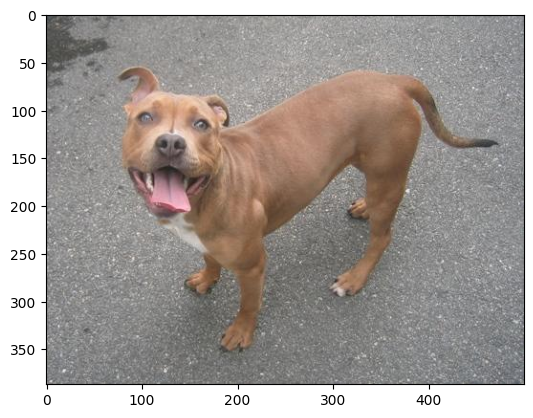

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

This is the same image converted to a tensor and displayed using matplotlib. Note that the torch dimensions follow [channel, height, width]<br><br>
PyTorch automatically loads the [0,255] pixel channels to [0,1]:<br><br>
$\frac{90}{255}=0.3529\quad\frac{95}{255}=0.3725\quad\frac{98}{255}=0.3843$

In [ ]:
im[0,0,0]

tensor(0.3529)

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Resize'><tt>transforms.Resize(<em>size</em>)</tt></a>
If size is a sequence like (h, w), the output size will be matched to this. If size is an integer, the smaller edge of the image will be matched to this number.<br>i.e, if height > width, then the image will be rescaled to (size * height / width, size)

torch.Size([3, 224, 224])


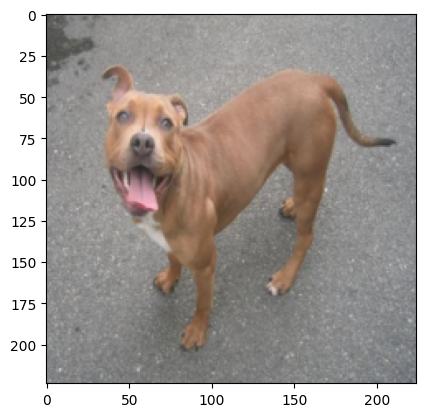

In [ ]:
transform = transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize((224,224)),
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

This resized the shortest side, and scaled the other. Let's try this on a small image.

(135, 102)


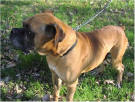

In [ ]:
small_dog = Image.open('CATS_DOGS/train/DOG/11.jpg')
print(small_dog.size)
display(small_dog)

torch.Size([3, 224, 224])


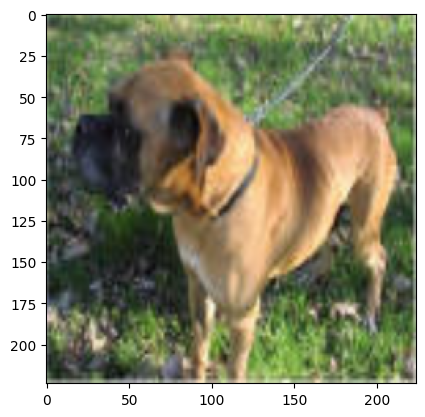

In [ ]:
im = transform(small_dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.CenterCrop'><tt>transforms.CenterCrop(<em>size</em>)</tt></a>
If size is an integer instead of sequence like (h, w), a square crop of (size, size) is made.

torch.Size([3, 224, 224])


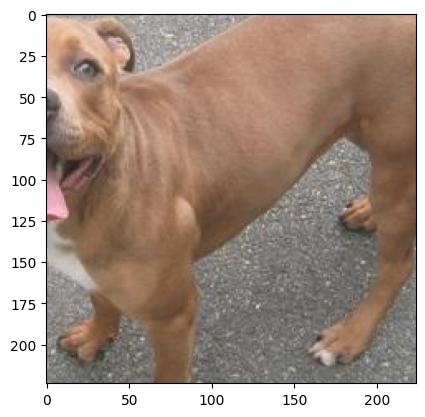

In [ ]:
transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
im = transform(dog) # this crops the original image
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

It may be better to resize the image first, then crop:

torch.Size([3, 224, 224])


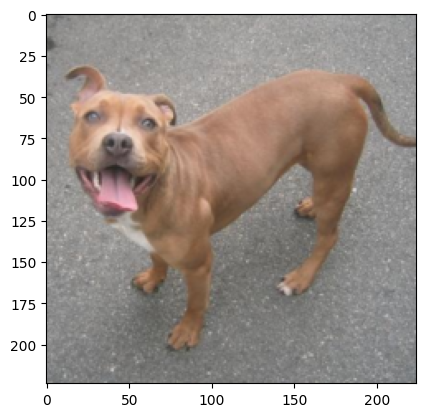

In [ ]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Other affine transformations
An <a href='https://en.wikipedia.org/wiki/Affine_transformation'><em>affine</em></a> transformation is one that preserves points and straight lines. Examples include rotation, reflection, and scaling. For instance, we can double the effective size of our training set simply by flipping the images.
### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomHorizontalFlip'><tt>transforms.RandomHorizontalFlip(<em>p=0.5</em>)</tt></a>
Horizontally flip the given PIL image randomly with a given probability.

torch.Size([3, 387, 500])


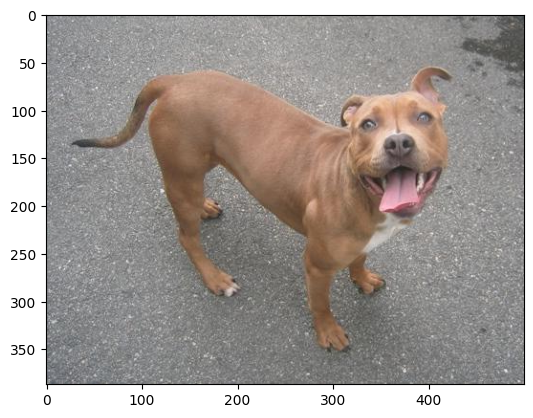

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.RandomRotation'><tt>transforms.RandomRotation(<em>degrees</em>)</tt></a>
If degrees is a number instead of sequence like (min, max), the range of degrees will be (-degrees, +degrees).<br>
Run the cell below several times to see a sample of rotations.

torch.Size([3, 387, 500])


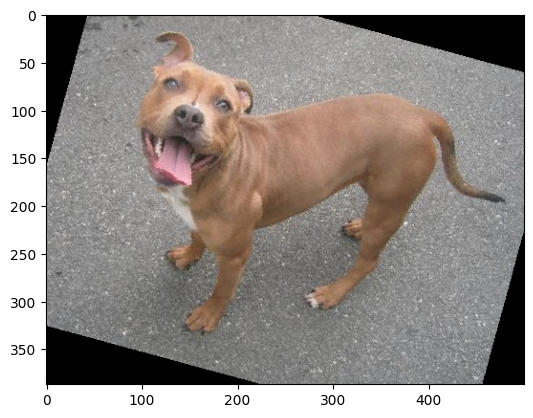

In [ ]:
transform = transforms.Compose([
    transforms.RandomRotation(30),  # rotate randomly between +/- 30 degrees
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Scaling is done using <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Resize'><tt>transforms.Resize(<em>size</em>)</tt></a>

torch.Size([3, 224, 224])


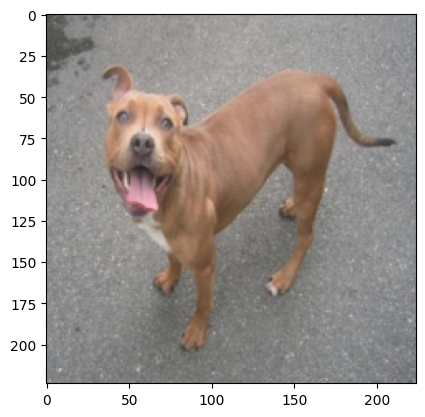

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224,224)),  # be sure to pass in a list or a tuple
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

### Let's put it all together

torch.Size([3, 224, 224])


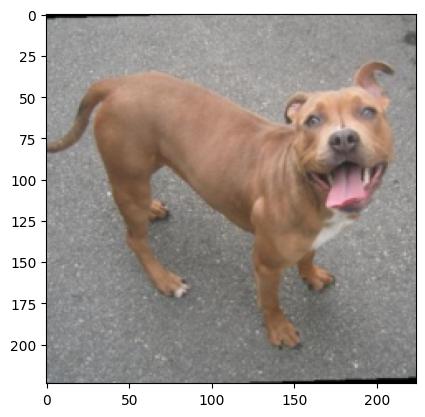

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),  # normally we'd set p=0.5
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

___
### Normalization
Once the image has been loaded into a tensor, we can perform normalization on it. This serves to make convergence happen quicker during training. The values are somewhat arbitrary - you can use a mean of 0.5 and a standard deviation of 0.5 to convert a range of [0,1] to [-1,1], for example.<br>However, <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>research has shown</a> that mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225] work well in practice.

`transforms.Normalize(mean, std)`:
Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input tensor
### $\quad\textrm {input[channel]} = \frac{\textrm{input[channel] - mean[channel]}}{\textrm {std[channel]}}$

torch.Size([3, 387, 500])


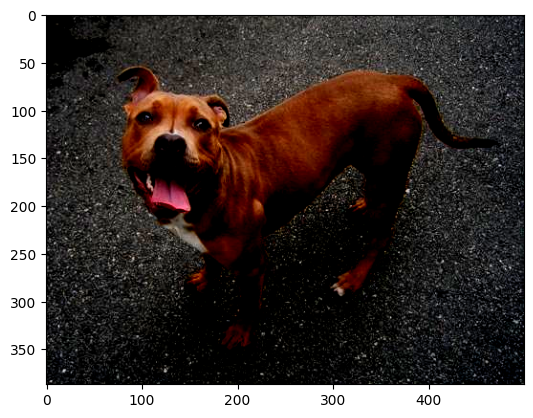

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Recall that before normalization, the upper-leftmost tensor had pixel values of <tt>[0.3529, 0.3725, 0.3843]</tt>.<br>
With normalization we subtract the channel mean from the input channel, then divide by the channel std.<br><br>
$\frac{(0.3529-0.485)}{0.229}=-0.5767\quad\frac{(0.3725-0.456)}{0.224}=-0.3725\quad\frac{(0.3843-0.406)}{0.225}=-0.0964$<br>

In [ ]:
(im/2+0.5)[0,0,0]

tensor(0.3529)

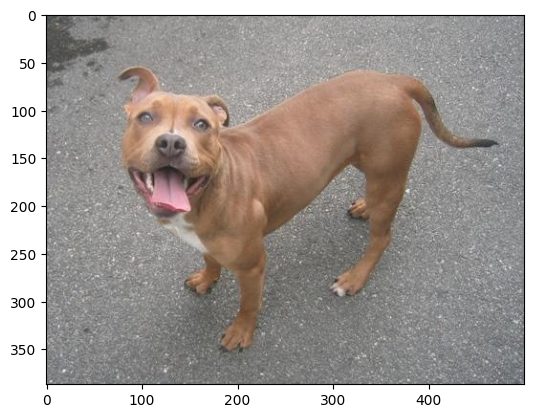

In [ ]:
plt.imshow(np.transpose((im/2+0.5).numpy(), (1, 2, 0)));

In [ ]:
# After normalization:
im[:,0,0]

tensor([-0.2941, -0.2549, -0.2314])

When displayed, matplotlib clipped this particular pixel up to [0,0,0] so it appears black on the screen. However, the appearance isn't important; the goal of normalization is improved mathematical performance.

### Optional: De-normalize the images
To see the image back in its true colors, we can apply an inverse-transform to the tensor being displayed.

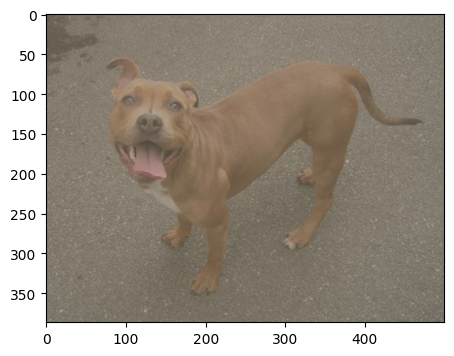

In [ ]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

Note that the original tensor was not modified:

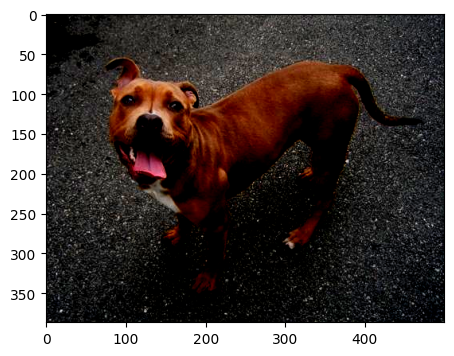

In [ ]:
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Custom transform
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [ ]:
class Rescale(object):
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image = sample
        img=sample.resize((self.output_size,self.output_size))


        return img


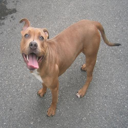

In [ ]:
rescale_transform=Rescale(128)
im_new=rescale_transform(dog)
im_new

 Now let's perform CNN on real images!

## CNN on Custom Images
For this exercise we're using a collection of Cats and Dogs images inspired by the classic <a href='https://www.kaggle.com/c/dogs-vs-cats'>Kaggle competition</a>.

In the last section we downloaded the files, looked at the directory structure, examined the images, and performed a variety of transforms in preparation for training.

In this section we'll define our model, then feed images through a training and validation sequence using DataLoader.



### Perform standard imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
from torchvision.utils import make_grid
import os
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

### Define transforms
In the previous section we looked at a variety of transforms available for data augmentation (rotate, flip, etc.) and normalization.<br>
Here we'll combine the ones we want, including the <a href='https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/22'>recommended normalization parameters</a> for mean and std per channel.

In [ ]:
train_transform = transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(224),             # resize shortest side to 224 pixels
        transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

### Prepare train and test sets, loaders
We're going to take advantage of a built-in torchvision dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder'><tt><strong>ImageFolder</strong></tt></a>.

Here we are gonna take advantage of torch dataset. It is a method use to make dataset easier to handle.

This class takes `root` as the path to the dataset location. It will also take `transform` and `target_transform` as to apply any transformation neccary to the images.

You can read the code under `__init__` to understant the flow of our dataset intialization.

After and instance of `CustomDataset` is created for our dataset. We have an object which is iteratble and the data in it can be accessed by using a for loop on it.

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root, transform=None, target_transform=None):
        # Initializing Captcha Dataset class
        super(CustomDataset, self).__init__()
        self.root=root
        # Listing all files in the provided root directory
        self.cat_files = sorted(os.listdir(root+"/CAT"))
        self.dog_files = sorted(os.listdir(root+"/DOG"))
        # Initializing lists to store images and their respective labels
        self.images = []
        self.labels = []
        self.transform=transform
        self.target_transform=target_transform

        # Iterating through each file in the root directory
        for img in self.cat_files:
            # Checking if the file is an image file
            if self.is_image_file(img):
                label = 0
                # Storing image path and label
                self.images.append(os.path.join(self.root,"CAT", img))
                self.labels.append(label)
        for img in self.dog_files:
            # Checking if the file is an image file
            if self.is_image_file(img):
                label = 1
                # Storing image path and label
                self.images.append(os.path.join(self.root,"DOG", img))
                self.labels.append(label)

    def __len__(self):
        # Returning the total number of images
        return len(self.labels)

    def __getitem__(self, idx:int):
        # Retrieving image and target label based on index
        img, target = self.images[idx], self.labels[idx]

        # Checking if the index is a slice (multiple items requested)
        if isinstance(idx, slice):
            tmp = []
            # Iterating through each image in the slice
            for item in img:
                # Applying transformations if specified
                if self.transform is not None:
                    tmp.append(self.transform(self.read_image(item)))
                else:
                    tmp.append(self.read_image(item))
            img = tmp
        else:
            # Applying transformations if specified
            if self.transform is not None:
                img = self.transform(self.read_image(img))
            else:
                img = self.read_image(img)

        # Applying target transformations if specified

        # Returning image and target label
        return img, target

    # Method to read image from file path
    def read_image(self, path):
        img = Image.open(path)
        # Converting image to RGB format
        return img.convert('RGB')

    # Method to check if a file is an image file
    def is_image_file(self, filename):
        # Checking if filename ends with any of the specified image extensions
        return any(filename.endswith(extension) for extension in [".jpg", ".jpeg", ".png"])

Now Comes your part. Define the dataset. We don't need a `target_transform` at this time. You should be aware of the location of the dataset at this point.

In [ ]:
root = 'CATS_DOGS'

train_data = CustomDataset(os.path.join(root, 'train'), transform=train_transform)
test_data = CustomDataset(os.path.join(root, 'test'), transform=test_transform)

train_data[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ...,  2.2147,  2.1975,  2.1633],
          [-2.1179, -2.1179, -2.1179,  ...,  2.2147,  2.1975,  2.1633],
          [-2.1179, -2.1179, -2.1179,  ...,  2.2147,  2.1975,  2.1804],
          ...,
          [ 0.6221,  0.4851,  0.3481,  ..., -2.1179, -2.1179, -2.1179],
          [ 0.7077,  0.5707,  0.4337,  ..., -2.1179, -2.1179, -2.1179],
          [ 0.7419,  0.6221,  0.4679,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ...,  2.0609,  2.0434,  2.0084],
          [-2.0357, -2.0357, -2.0357,  ...,  2.0609,  2.0434,  2.0084],
          [-2.0357, -2.0357, -2.0357,  ...,  2.0609,  2.0434,  2.0259],
          ...,
          [ 0.2052,  0.0651, -0.0574,  ..., -2.0357, -2.0357, -2.0357],
          [ 0.2752,  0.1527,  0.0126,  ..., -2.0357, -2.0357, -2.0357],
          [ 0.3277,  0.1877,  0.0651,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ...,  1.1237,  1.0888,  1.0539],
          [-1.8044, -1.8044,

In [ ]:
root = 'CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transform)

Now we will create a dataloader from our dataset. This mainly because dataloaders are desgin to handle loading data as fast a possible. You can also provid

In [ ]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

class_names=["CAT","DOG"]
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

Training images available: 18743
Testing images available:  6251


In [ ]:
b=next(iter(train_loader))

DATALOADER:https://pytorch.org/docs/stable/data.html

### Display a batch of images
To verify that the training loader selects cat and dog images at random, let's show a batch of loaded images.<br>
Recall that imshow clips pixel values <0, so the resulting display lacks contrast. We'll apply a quick inverse transform to the input tensor so that images show their "true" colors.

Label: [1 0 0 1 0 1 1 0 0 0]
Class: DOG CAT CAT DOG CAT DOG DOG CAT CAT CAT


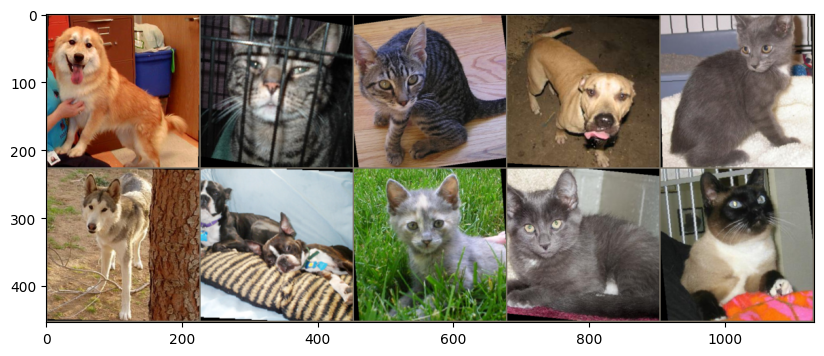

In [ ]:
# Grab the first batch of 10 images
for images,labels in train_loader:
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

### Define the model
Now you are on your own. Design a model that suits your need.
You can also try resdual models that take is done by applying CNN block that don't effect the dimmension of the data and then adding the input to the output.
To design the model four type of Neural Networks function:`nn.Conv2d`,`nn.Linear`,`F.max_pool2d`, and `F.relu`.

Tip: The output of the model should have a dimmension of 2.

In [ ]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Desing the network
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, X):
        # Use the network
        x = self.pool(F.relu(self.conv1(X)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1, 64 * 28 * 28)  # Flatten the output from the conv layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return F.log_softmax(X, dim=1)

In [ ]:
test_model=ConvolutionalNetwork()
sample=torch.randn(10,3,224,224)
res=test_model(sample)
# res.sum().backward()

<div class="alert alert-info"><strong>Why <tt>(54x54x16)</tt>?</strong><br>
With 224 pixels per side, the kernels and pooling layers result in $\;(((224-2)/2)-2)/2 = 54.5\;$ which rounds down to 54 pixels per side.</div>

### Instantiate the model, define loss and optimization functions
We're going to call our model "CNNmodel" to differentiate it from an "AlexNetmodel" we'll use later.

In [ ]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

### Looking at the trainable parameters

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [ ]:
count_parameters(CNNmodel)

     432
      16
    4608
      32
   18432
      64
 6422528
     128
    8192
      64
     128
       2
________
 6454626


In [ ]:
count_parameters(CNNmodel)

     162
       6
     864
      16
 5598720
     120
   10080
      84
     168
       2
________
 5610222


### Train the model
In the interests of time, we'll limit the number of training batches to 800, and the number of testing batches to 300. We'll train the model on 8000 of 18743 available images, and test it on 3000 out of 6251 images.

In [ ]:
import time
start_time = time.time()
from tqdm import tqdm
epochs = 3
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

max_trn_batch = 100
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(tqdm(train_loader)):
        X_train=X_train.to(DEVICE)
        y_train=y_train.to(DEVICE)
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1

        # Apply the model
        # TODO: Get predictions of the model and calculate the loss

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        # TODO: Update parameters and zero out the optimizer


        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            X_test=X_test.to(DEVICE)
            y_test=y_test.to(DEVICE)
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr.item())

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

  5%|▌         | 100/1875 [00:22<06:37,  4.46it/s]



Duration: 167 seconds


### Save the trained model

In [ ]:
torch.save(CNNmodel.state_dict(), 'CustomImageCNNModel.pt')

### Evaluate model performance

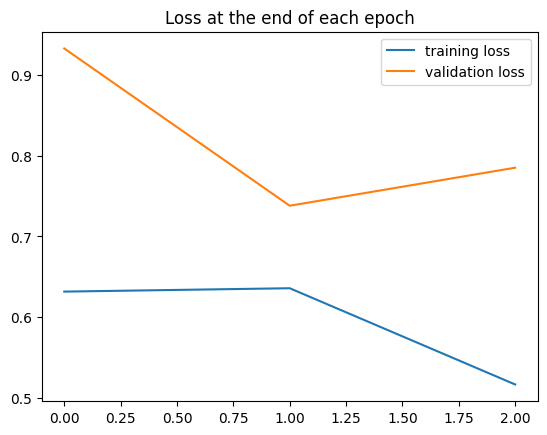

In [ ]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

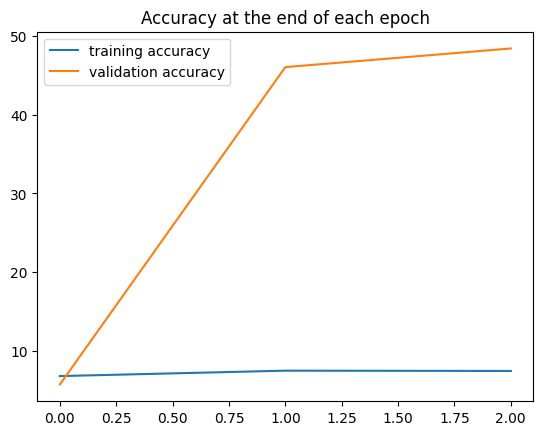

In [ ]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1]*100/3000:.3f}%')

[172, 1381, 1452]
Test accuracy: 48.400%


### Download a pretrained model
Torchvision has a number of proven models available through <a href='https://pytorch.org/docs/stable/torchvision/models.html#classification'><tt><strong>torchvision.models</strong></tt></a>:
<ul>
<li><a href="https://arxiv.org/abs/1404.5997">AlexNet</a></li>
<li><a href="https://arxiv.org/abs/1409.1556">VGG</a></li>
<li><a href="https://arxiv.org/abs/1512.03385">ResNet</a></li>
<li><a href="https://arxiv.org/abs/1602.07360">SqueezeNet</a></li>
<li><a href="https://arxiv.org/abs/1608.06993">DenseNet</a></li>
<li><a href="https://arxiv.org/abs/1512.00567">Inception</a></li>
<li><a href="https://arxiv.org/abs/1409.4842">GoogLeNet</a></li>
<li><a href="https://arxiv.org/abs/1807.11164">ShuffleNet</a></li>
<li><a href="https://arxiv.org/abs/1801.04381">MobileNet</a></li>
<li><a href="https://arxiv.org/abs/1611.05431">ResNeXt</a></li>
</ul>
These have all been trained on the <a href='http://www.image-net.org/'>ImageNet</a> database of images. Our only task is to reduce the output of the fully connected layers from (typically) 1000 categories to just 2.

To access the models, you can construct a model with random weights by calling its constructor:<br>
<pre>resnet18 = models.resnet18()</pre>
You can also obtain a pre-trained model by passing pretrained=True:<br>
<pre>resnet18 = models.resnet18(pretrained=True)</pre>
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

Feel free to investigate the different models available. Each one will be downloaded to a cache directory the first time they're accessed - from then on they'll be available locally.

For its simplicity and effectiveness, we'll use AlexNet:

In [ ]:
AlexNetmodel = models.alexnet(pretrained=True).to(DEVICE)
AlexNetmodel

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 118MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

<div class="alert alert-info">This model uses <a href='https://pytorch.org/docs/master/nn.html#torch.nn.AdaptiveAvgPool2d'><tt><strong>torch.nn.AdaptiveAvgPool2d(<em>output_size</em>)</strong></tt></a> to convert the large matrix coming out of the convolutional layers to a (6x6)x256 matrix being fed into the fully connected layers.</div>

### Freeze feature parameters
We want to freeze the pre-trained weights & biases. We set <tt>.requires_grad</tt> to False so we don't backprop through them.

In [ ]:
for param in AlexNetmodel.parameters():
    param.requires_grad = False

### Modify the classifier
Next we need to modify the fully connected layers to produce a binary output. The section is labeled "classifier" in the AlexNet model.<br>
Note that when we assign new layers, their parameters default to <tt>.requires_grad=True</tt>.

In [ ]:
torch.manual_seed(42)
AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(1024, 2),
                                 nn.LogSoftmax(dim=1)).to(DEVICE)
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

In [ ]:
# These are the TRAINABLE parameters:
count_parameters(AlexNetmodel)

 9437184
    1024
    2048
       2
________
 9440258


### Define loss function & optimizer
We only want to optimize the classifier parameters, as the feature parameters are frozen.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)

### Train the model
Remember, we're only training the fully connected layers. The convolutional layers have fixed weights and biases. For this reason, we only need to run one epoch.

In [ ]:
import time
start_time = time.time()

epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(tqdm(train_loader)):
        if b == max_trn_batch:
            break
        b+=1

        # TODO: Train the AlexNet


        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(tqdm(test_loader)):
            X_test, y_test=X_test.to(DEVICE),y_test.to(DEVICE)
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr.item())

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

 11%|█         | 200/1875 [01:33<11:47,  2.37it/s]

epoch:  0  batch:  200 [  2000/8000]  loss: 0.40178317  accuracy:  90.050%


 21%|██▏       | 400/1875 [03:05<13:27,  1.83it/s]

epoch:  0  batch:  400 [  4000/8000]  loss: 0.01158282  accuracy:  91.225%


 32%|███▏      | 600/1875 [04:37<09:22,  2.27it/s]

epoch:  0  batch:  600 [  6000/8000]  loss: 0.77661633  accuracy:  91.750%


 43%|████▎     | 800/1875 [06:20<08:30,  2.10it/s]


epoch:  0  batch:  800 [  8000/8000]  loss: 0.01528458  accuracy:  92.400%


 48%|████▊     | 300/626 [01:41<01:50,  2.96it/s]


Duration: 482 seconds


In [ ]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1]*100/3000:.3f}%')

[2730]
Test accuracy: 91.000%


### Run a new image through the model
We can also pass a single image through the model to obtain a prediction.<br>
Pick a number from 0 to 6250, assign it to "x", and we'll use that value to select an image from the Cats and Dogs test set.

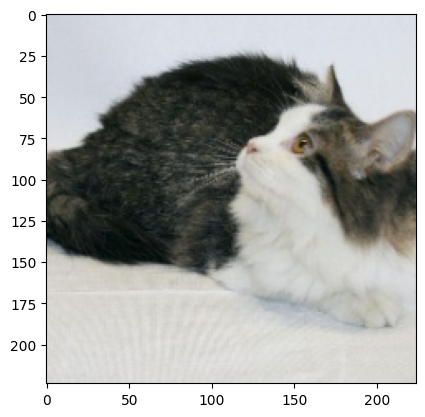

In [ ]:
x = 2019
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
test_data[x][0].shape

torch.Size([3, 224, 224])

In [ ]:
# CNN Model Prediction:

CNNmodel.eval()
with torch.no_grad():
    new_pred = CNNmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT


In [ ]:
# AlexNet Model Prediction:

AlexNetmodel.eval()
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT
